# Project 2 - 

Team Members:
    * Phyllis Summers
    * Aparna Srikanti
    * Helen Wu
    
    
Purpose:

    Using a Kaggle Dataset (https://www.kaggle.com/jrosenblum123/visualizations-and-predicting-student-test-scores) on 
    Student Performance perform:
    
    * Data Exploration
    * Data Visualization leveraging R
    * Identify regression between different points of data
    * Identify if dependencies/correlation exist between different points of data
    
    The Kaggle Dataset contains marks secured by the students in high school.  Students are from the United States.  
    There are 1000 sample records.

In [196]:
# Load Dependencies
library(tidyverse)
library(ggplot2)
library(plyr)
# library(randomForest)
library(caTools)
library(miscTools)
library(rmarkdown)
library(pastecs)
library(psych)
library(Rmisc)
library(vioplot)
library(scatterplot3d)
library(MASS)
library(dplyr)
library(relaimpo)
library(ggthemes)
library(RColorBrewer)
library(ggrepel)


In [197]:
# Read in dataset
students <-read_csv("StudentsPerformance.csv")

Parsed with column specification:
cols(
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)


In [198]:
# After reviewing data and column names, rename columns for easier use in coding
colnames(students)[colnames(students)=="race/ethnicity"] <- "ethnicity"
colnames(students)[colnames(students)=="parental level of education"] <- "parent_education"
colnames(students)[colnames(students)=="test preparation course"] <- "test_prep_status"
colnames(students)[colnames(students)=="math score"] <- "math"
colnames(students)[colnames(students)=="reading score"] <- "reading"
colnames(students)[colnames(students)=="writing score"] <- "writing"
head(students)

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


In [199]:
# Lunch status is a qualitative data representation.  Added a lunch_code to provide 
# quantitative data for same data to allow use of the data within analysis that requires quantitative values.

students <- students %>% 
       mutate(lunch_code = case_when(lunch == "standard" ~ 1, 
                                     lunch == "free/reduced" ~ 2,
                                     TRUE ~ 0))
              
head(students)

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code
female,group B,bachelor's degree,standard,none,72,72,74,1
female,group C,some college,standard,completed,69,90,88,1
female,group B,master's degree,standard,none,90,95,93,1
male,group A,associate's degree,free/reduced,none,47,57,44,2
male,group C,some college,standard,none,76,78,75,1
female,group B,associate's degree,standard,none,71,83,78,1


# Summary Statistics

    Different summary statistics were run on the data to obtain Cooefficients, standard deviation, aggregate statistics,
    variance, etc.
    
    Functions used include:
    
    * summary - produce result summaries of the results of various model fitting functions
    NOTE:  We noticed a difference in R Studio output from Jupyter Notebook output
    * stat.desc - Compute a table giving various descriptive statistics about the series in a data frame or 
    in a single/multiple time series
    * describe - Concise Statistical Description Of A Vector, Matrix, Data Frame, Or Formula
    
    R Studio Summary output:
    
    
    

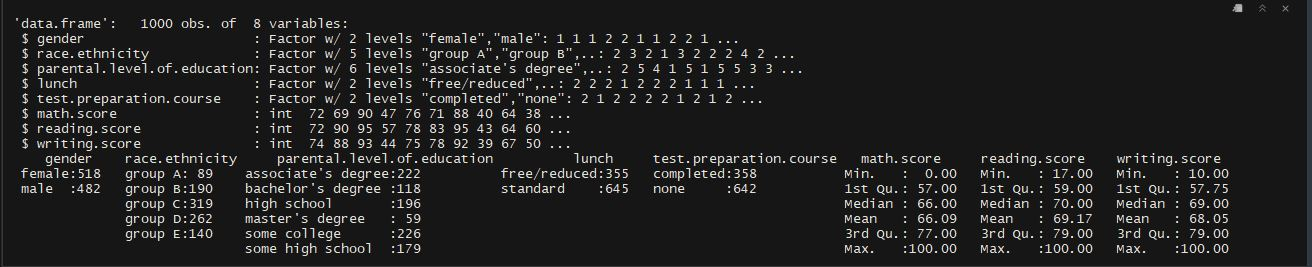

In [200]:
# mean,median,25th and 75th quartiles,min,max
summary(students)

    gender           ethnicity         parent_education      lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 test_prep_status        math        reading       writing      lunch_code 
 Length:1000        Min.   :  0   Min.   : 17   Min.   : 10   Min.   :1.0  
 Class :character   1st Qu.: 57   1st Qu.: 59   1st Qu.: 58   1st Qu.:1.0  
 Mode  :character   Median : 66   Median : 70   Median : 69   Median :1.0  
                    Mean   : 66   Mean   : 69   Mean   : 68   Mean   :1.4  
                    3rd Qu.: 77   3rd Qu.: 79   3rd Qu.: 79   3rd Qu.:2.0  
     

In [201]:
# Compute a table giving various descriptive statistics about the series in a data frame or in a single/multiple time series

stat.desc(students) 
# nbr.val, nbr.null, nbr.na, min max, range, sum, 
# median, mean, SE.mean, CI.mean, var, std.dev, coef.var

,gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code
nbr.val,NA,NA,NA,NA,NA,1e+03,1e+03,1e+03,1e+03
nbr.null,NA,NA,NA,NA,NA,1e+00,0e+00,0e+00,0e+00
nbr.na,NA,NA,NA,NA,NA,0e+00,0e+00,0e+00,0e+00
min,NA,NA,NA,NA,NA,0e+00,2e+01,1e+01,1e+00
max,NA,NA,NA,NA,NA,1e+02,1e+02,1e+02,2e+00
range,NA,NA,NA,NA,NA,1e+02,8e+01,9e+01,1e+00
sum,NA,NA,NA,NA,NA,7e+04,7e+04,7e+04,1e+03
median,NA,NA,NA,NA,NA,7e+01,7e+01,7e+01,1e+00
mean,NA,NA,NA,NA,NA,7e+01,7e+01,7e+01,1e+00
SE.mean,NA,NA,NA,NA,NA,5e-01,5e-01,5e-01,2e-02


In [202]:
describe(students)
# item name ,item number, nvalid, mean, sd, 
# median, mad, min, max, skew, kurtosis, se

Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in describe(students):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
gender*,1,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
ethnicity*,2,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
parent_education*,3,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
lunch*,4,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
test_prep_status*,5,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
math,6,1000,66,15.2,66,66,15,0,100,100,-0.3,0.26,0.48
reading,7,1000,69,14.6,70,70,15,17,100,83,-0.3,-0.08,0.46
writing,8,1000,68,15.2,69,68,16,10,100,90,-0.3,-0.05,0.48
lunch_code,9,1000,1,0.5,1,1,0,1,2,1,0.6,-1.64,0.02


# Histogram - Composite Score

    Initial analysis to determine if we had a fair, representative sample.  A histogram was selected to visualize this.
    
    Plot created to reflect the histogram of the composite score of students across math, reading and writing.  This shows 
    that the sample data follows a normal distribution

gender,ethnicity,parent_education,lunch,test_prep_status,math,reading,writing,lunch_code,composite.score,avg_score
female,group B,bachelor's degree,standard,none,72,72,74,1,218,73
female,group C,some college,standard,completed,69,90,88,1,247,82
female,group B,master's degree,standard,none,90,95,93,1,278,93
male,group A,associate's degree,free/reduced,none,47,57,44,2,148,49
male,group C,some college,standard,none,76,78,75,1,229,76
female,group B,associate's degree,standard,none,71,83,78,1,232,77


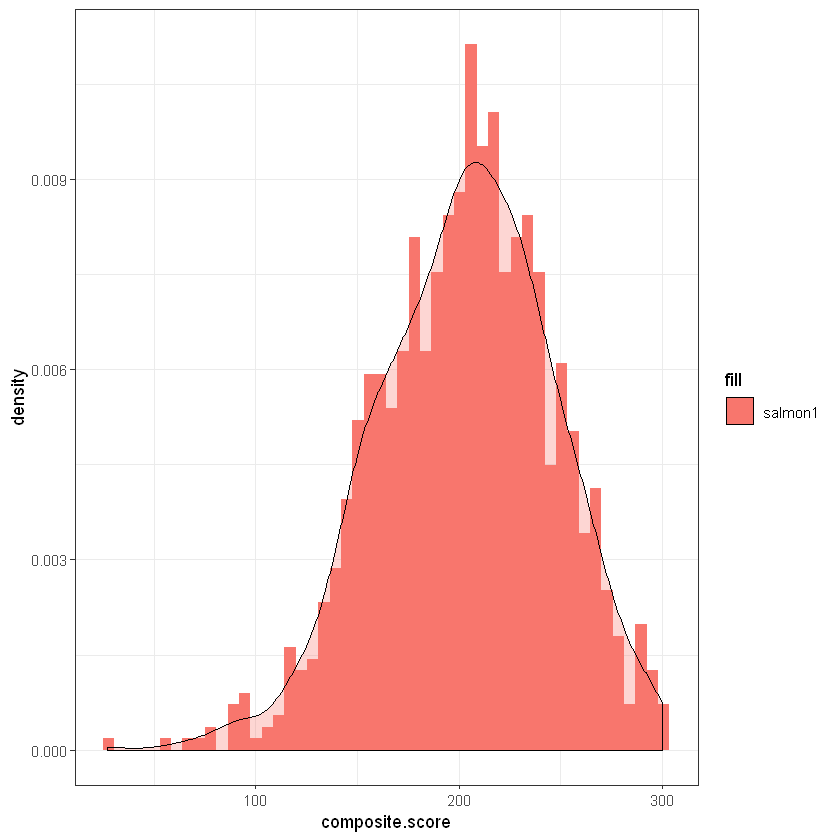

In [203]:
students <- students %>% mutate(composite.score = math + reading + writing)
students <- students %>% mutate(avg_score = composite.score / 3)
head(students)
ggplot(students, aes(x = composite.score, fill = 'salmon1')) + 
    geom_histogram(bins = 50, aes(y = ..density..)) + geom_density(alpha = 0.3) + theme_bw()

# Parent Education data analysis against other points

Analyzed Parent Education levels to other relevant data points


                  Df Sum Sq Mean Sq F value  Pr(>F)    
parent_education   5   7296    1459    6.52 5.6e-06 ***
Residuals        994 222394     224                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  Df Sum Sq Mean Sq F value  Pr(>F)    
parent_education   5  15623    3125    14.4 1.1e-13 ***
Residuals        994 215054     216                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

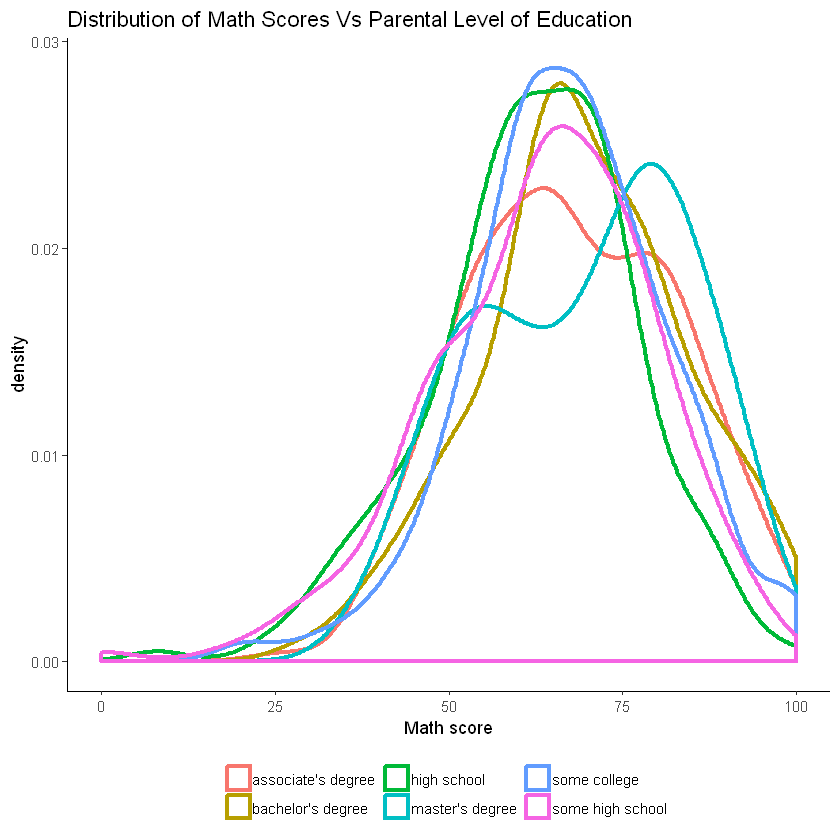

                  Df Sum Sq Mean Sq F value  Pr(>F)    
parent_education   5   9506    1901    9.29 1.2e-08 ***
Residuals        994 203446     205                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

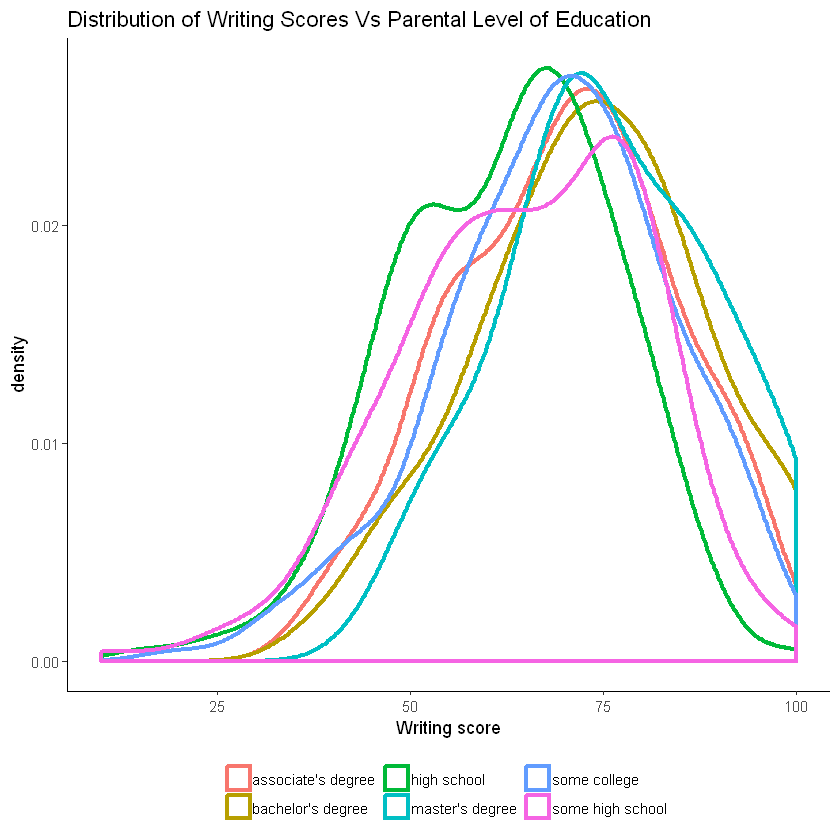

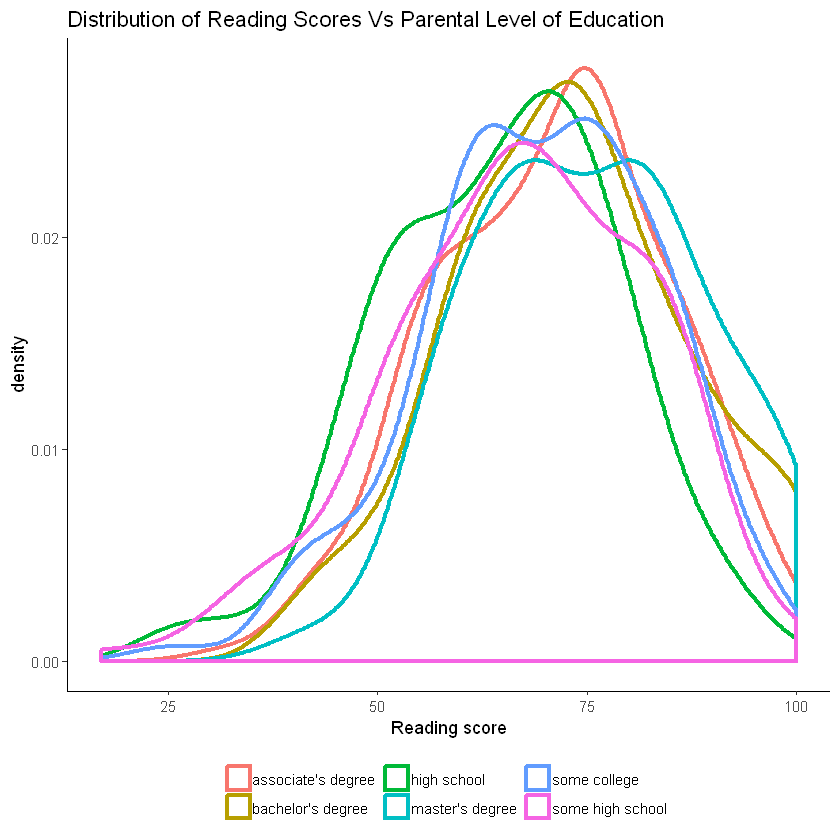

In [204]:
aov(math~parent_education,data=students) %>% summary()
ggplot(students,aes(math,color=parent_education)) + geom_density(lwd=1.2) + theme_classic() +
 theme(legend.position = "bottom",legend.title = element_blank()) +
 labs(x = "Math score",title="Distribution of Math Scores Vs Parental Level of Education")

aov(writing~parent_education,data=students) %>% summary()
ggplot(students,aes(writing,color=parent_education)) + geom_density(lwd=1.2) + theme_classic() +
 theme(legend.position = "bottom",legend.title = element_blank()) +
 labs(x = "Writing score",title="Distribution of Writing Scores Vs Parental Level of Education")

aov(reading~parent_education,data=students) %>% summary()
ggplot(students,aes(reading,color=parent_education)) + geom_density(lwd=1.2) + theme_classic() +
 theme(legend.position = "bottom",legend.title = element_blank()) +
 labs(x = "Reading score",title="Distribution of Reading Scores Vs Parental Level of Education")

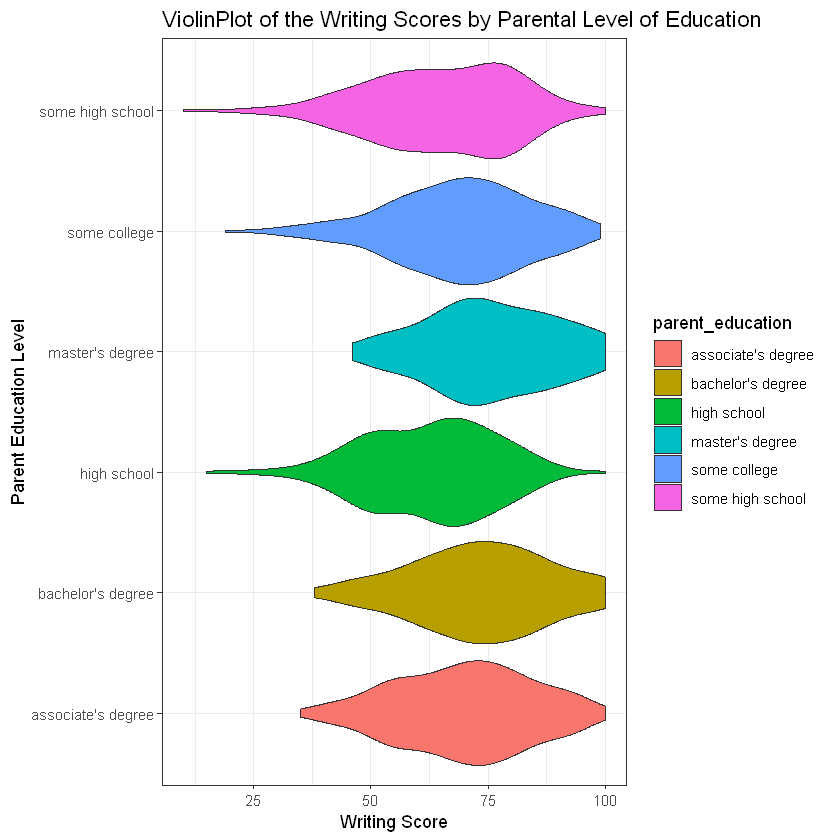

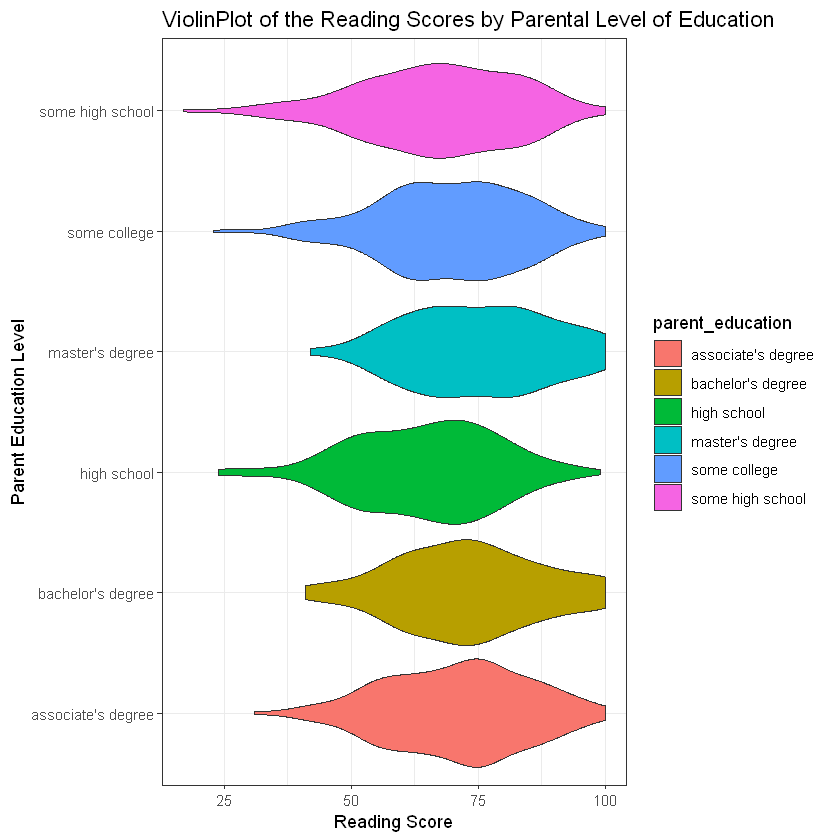

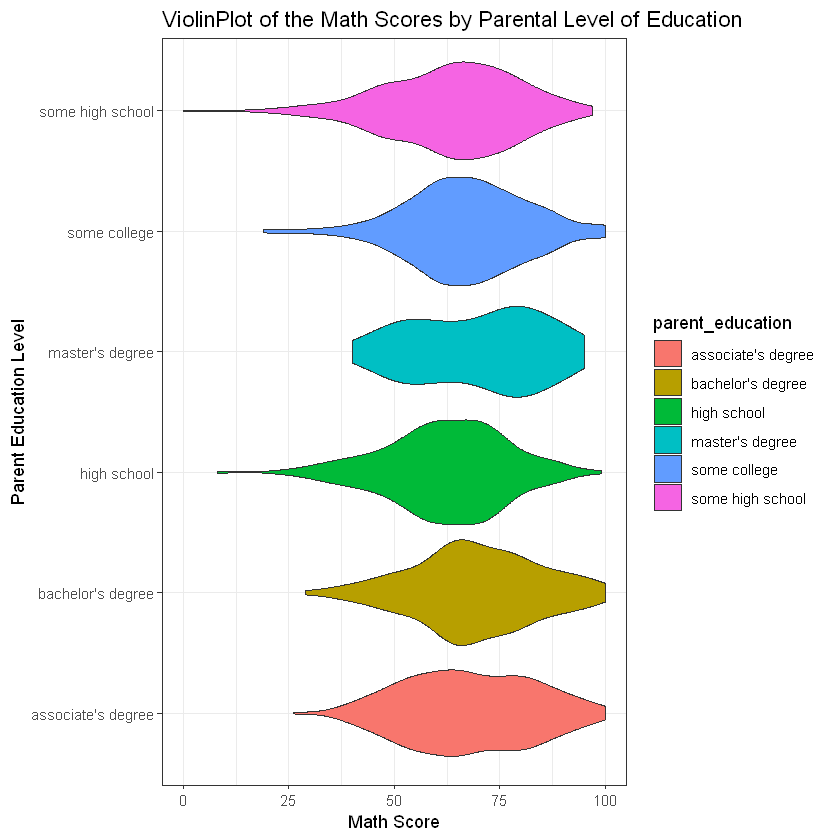

In [205]:
students %>%
 group_by(parent_education) %>%
 ggplot(aes(x = parent_education, y = writing, fill = parent_education, xlab = "writing", ylab = "parent_education",
  main = "Writing vs Parent Education")) +
   geom_violin()+ coord_flip() + theme_bw()+
   xlab("Parent Education Level") +
 ylab("Writing Score") +
 ggtitle('ViolinPlot of the Writing Scores by Parental Level of Education')

students %>%
 group_by(parent_education) %>%
 ggplot(aes(x = parent_education, y = reading, fill = parent_education, xlab = "reading", ylab = "parent_education",
  main = "Reading vs Parent Education")) +
   geom_violin()+ coord_flip() + theme_bw()+
   xlab("Parent Education Level") +
 ylab("Reading Score") +
 ggtitle('ViolinPlot of the Reading Scores by Parental Level of Education')

students %>%
 group_by(parent_education) %>%
 ggplot(aes(x = parent_education, y = math, fill = parent_education, xlab = "math", ylab = "parent_education",
  main = "Math vs Parent Education")) +
   geom_violin()+ coord_flip() + theme_bw()+
   xlab("Parent Education Level") +
 ylab("Math Score") +
 ggtitle('ViolinPlot of the Math Scores by Parental Level of Education')

# Does the gender of a student and Parent Education effect scores?

    The median of male students whose parents have master's degree is higher than in other degree levels.
    Female students whose parents have a high school degree seem to have the lowest median score.
    

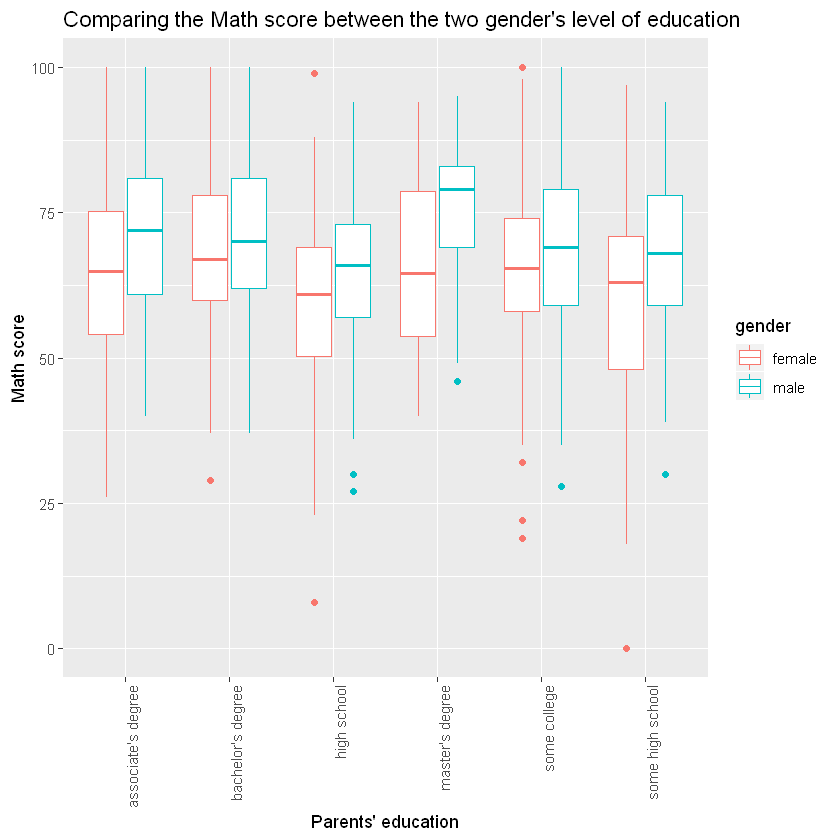

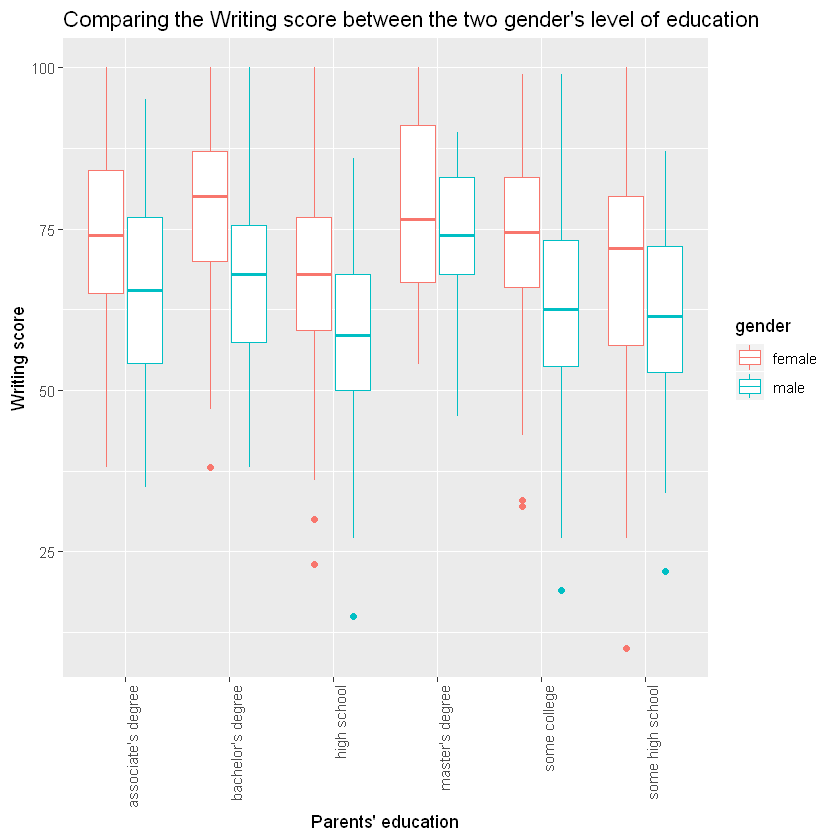

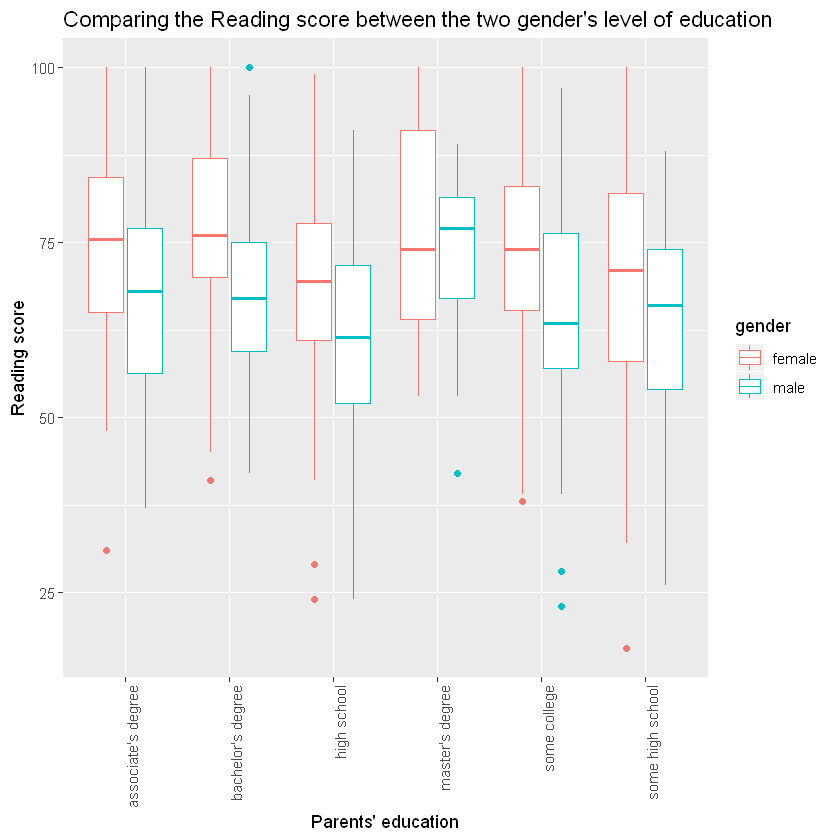

In [206]:
ggplot(students, aes(x=parent_education, y=math, color=gender)) + geom_boxplot() + xlab("Parents' education") + ylab("Math score")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparing the Math score between the two gender's level of education")

ggplot(students, aes(x=parent_education, y=writing, color=gender)) + geom_boxplot() + xlab("Parents' education") + ylab("Writing score")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparing the Writing score between the two gender's level of education")

ggplot(students, aes(x=parent_education, y=reading, color=gender)) + geom_boxplot() + xlab("Parents' education") + ylab("Reading score")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparing the Reading score between the two gender's level of education")



# Gender analysis 

Analysis was done based on gender grouping against scores


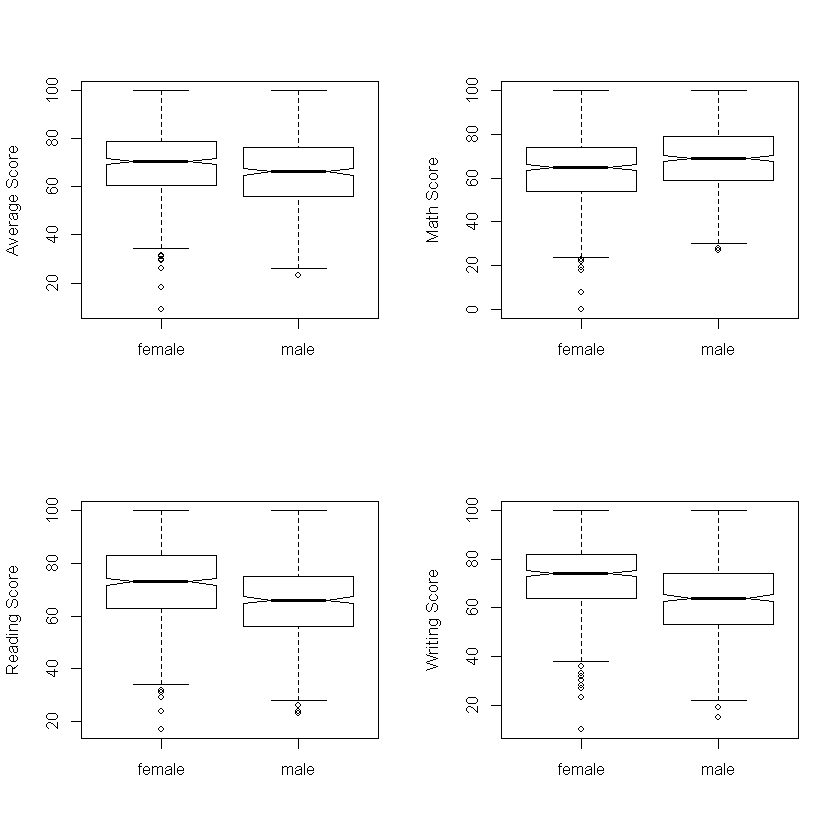

In [207]:
# Create Plot: gender vs. scores

students$avg = (students$math + students$reading + students$writing) / 3
par(mfrow = c(2,2))
boxplot(students$avg ~ students$gender, ylab = "Average Score", notch = TRUE)
boxplot(students$math ~ students$gender, ylab = "Math Score", notch = TRUE)
boxplot(students$reading ~ students$gender, ylab = "Reading Score", notch = TRUE)
boxplot(students$writing ~ students$gender, ylab = "Writing Score", notch = TRUE)

             Df Sum Sq Mean Sq F value  Pr(>F)    
gender        1   6481    6481      29 9.1e-08 ***
Residuals   998 223208     224                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

             Df Sum Sq Mean Sq F value  Pr(>F)    
gender        1  12711   12711    63.4 4.7e-15 ***
Residuals   998 200242     201                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

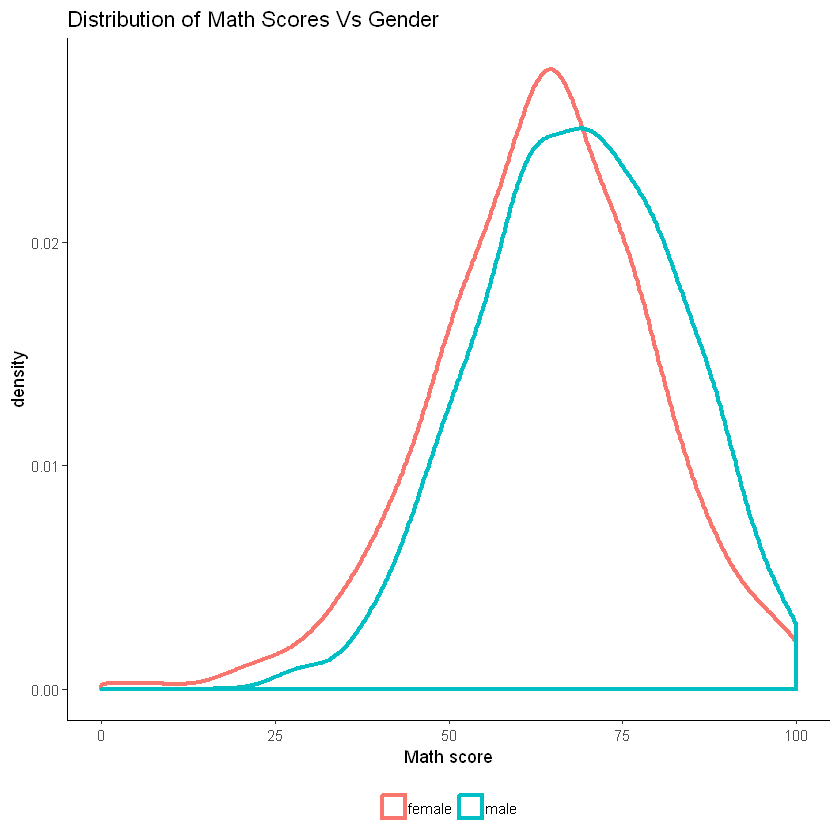

             Df Sum Sq Mean Sq F value Pr(>F)    
gender        1  20931   20931    99.6 <2e-16 ***
Residuals   998 209746     210                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

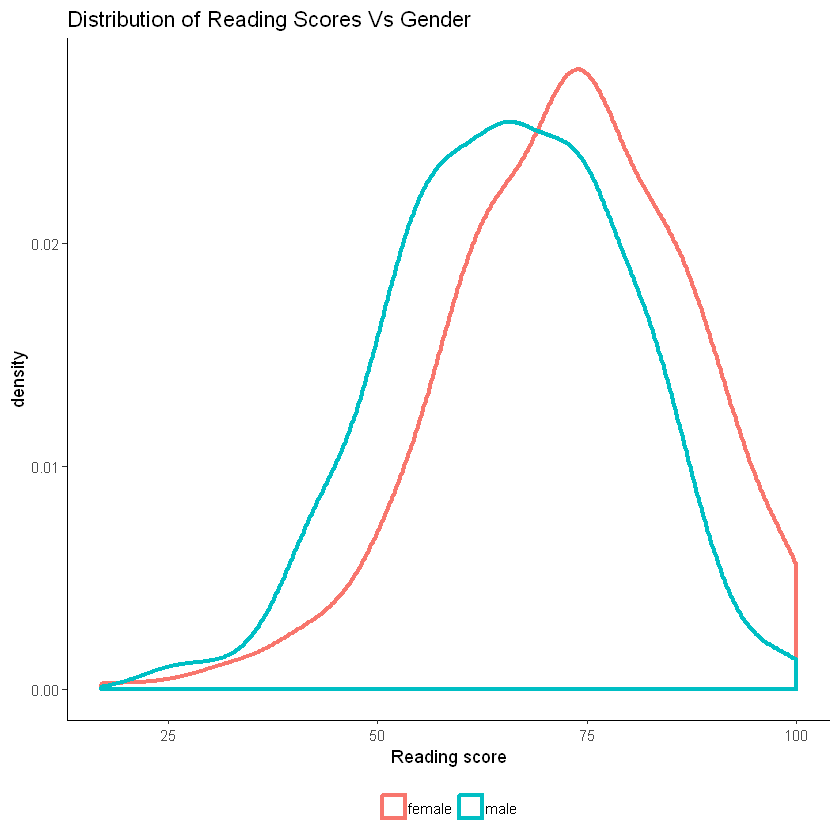

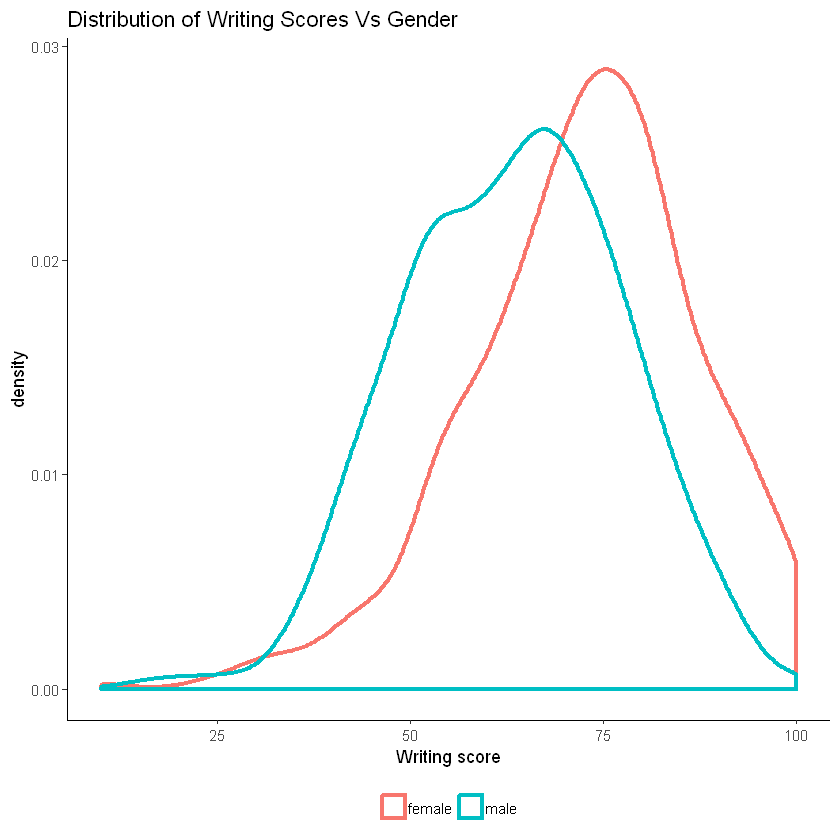

In [208]:
## Math scores and Gender

aov(math~gender,data=students) %>% summary()
ggplot(students,aes(math,color=gender)) + geom_density(lwd=1.2) + theme_classic() +
  theme(legend.position = "bottom",legend.title = element_blank()) +
  labs(x = "Math score",title="Distribution of Math Scores Vs Gender")

## Reading scores and Gender
aov(reading~gender,data=students) %>% summary()
ggplot(students,aes(reading,color=gender)) + geom_density(lwd=1.2) + theme_classic() +
  theme(legend.position = "bottom",legend.title = element_blank()) +
  labs(x = "Reading score",title="Distribution of Reading Scores Vs Gender")

aov(writing~gender,data=students) %>% summary()
ggplot(students,aes(writing,color=gender)) + geom_density(lwd=1.2) + theme_classic() +
  theme(legend.position = "bottom",legend.title = element_blank()) +
  labs(x = "Writing score",title="Distribution of Writing Scores Vs Gender")

# Lunch Status analysis

Analysis of Lunch Status to various other data attributes was completed.


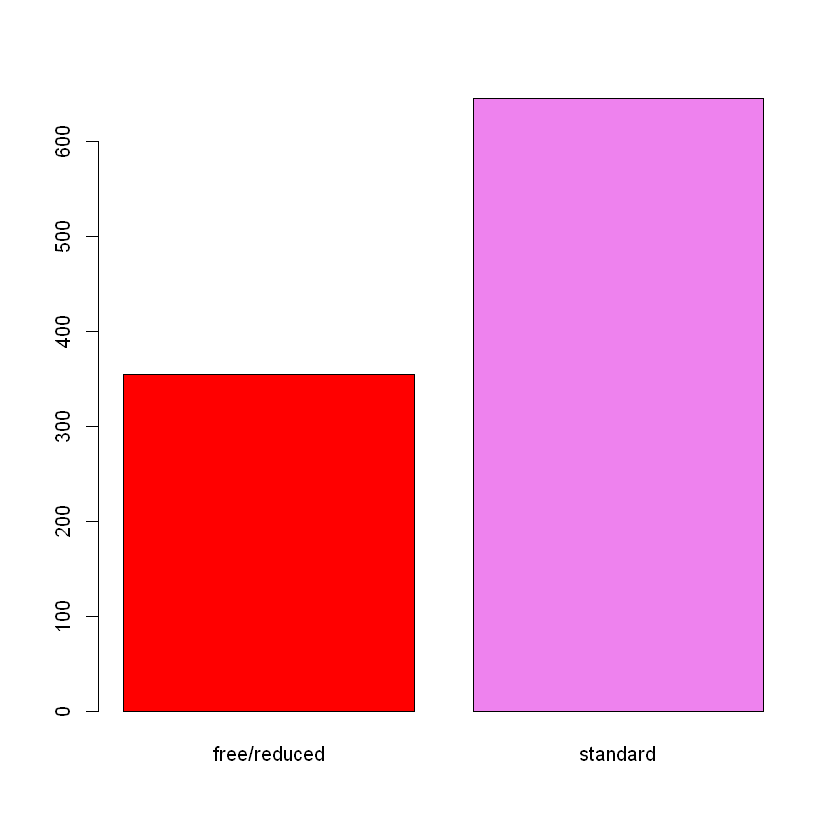

In [209]:
# Bar graph the frequency distribution of Standard versus free/reduced lunches
colors = c("red", "violet")
barplot(lunch.freq, col=colors)

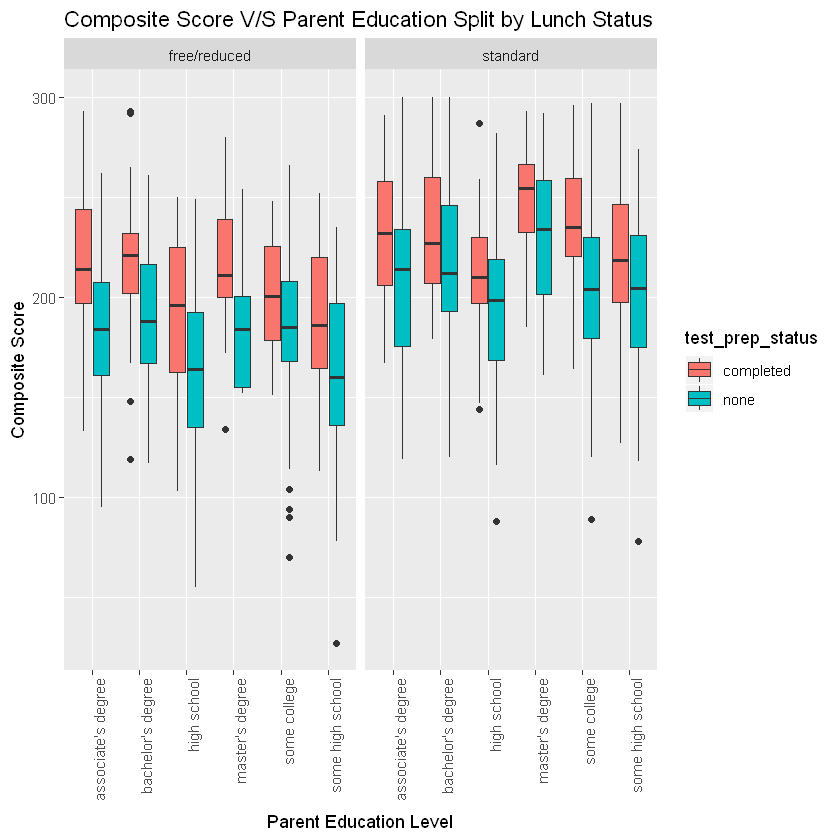

In [210]:
ggplot(data=students, aes(y=composite.score, x= parent_education, fill= test_prep_status))+geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    ggtitle("Composite Score V/S Parent Education Split by Lunch Status")+xlab("Parent Education Level")+ylab("Composite Score")+facet_grid(~lunch)

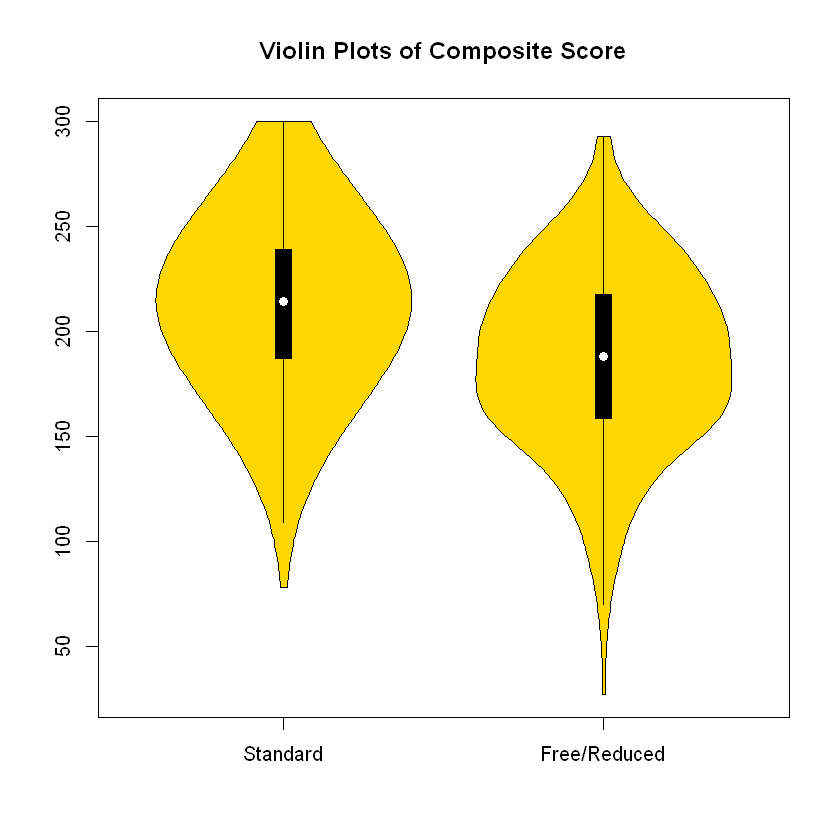

In [211]:
# Violin Plots
library(vioplot)
x1 <- students$composite.score[students$lunch_code==1]
x2 <- students$composite.score[students$lunch_code==2]

vioplot(x1, x2, names=c("Standard", "Free/Reduced"), 
   col="gold")
title("Violin Plots of Composite Score")

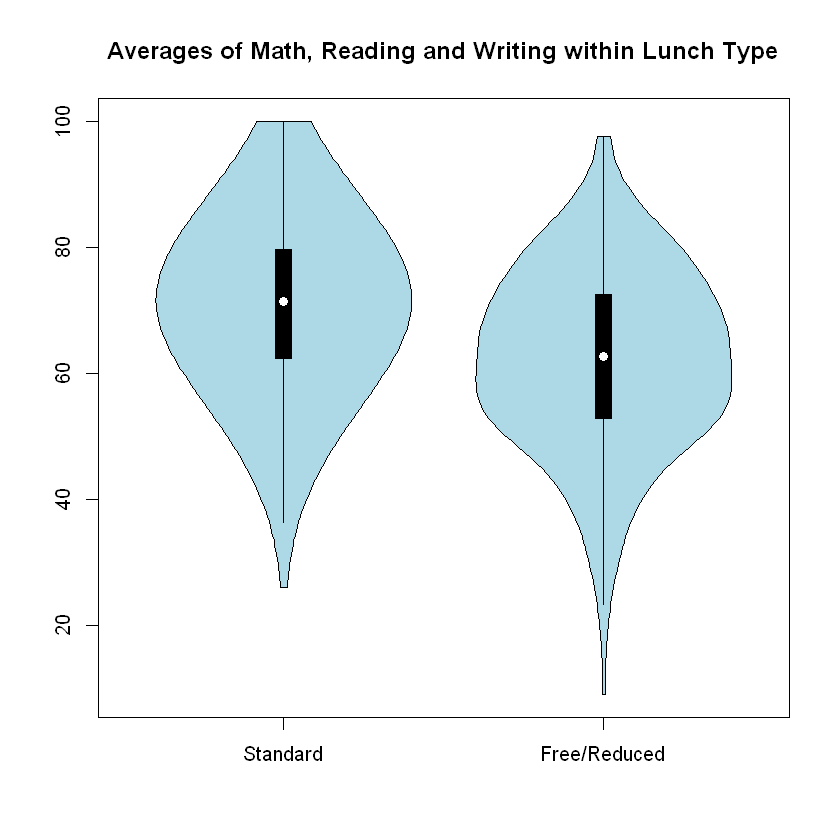

In [212]:
# Violin Plots - average scores across reading/writing/math
library(vioplot)
x1 <- students$avg_score[students$lunch_code==1]
x2 <- students$avg_score[students$lunch_code==2]

vioplot(x1, x2, names=c("Standard", "Free/Reduced"), 
   col="lightblue")
title("Averages of Math, Reading and Writing within Lunch Type")

# Analysis of various data points

    Group E ethnicity grouping has higher composite scores than other groups.  Group E also appears to have higher 
    level of Parental Education
    NOTE:  Additional data that identifies the ethnicity really would be required to do any deeper analysis into ethnicity
    correlation.
    

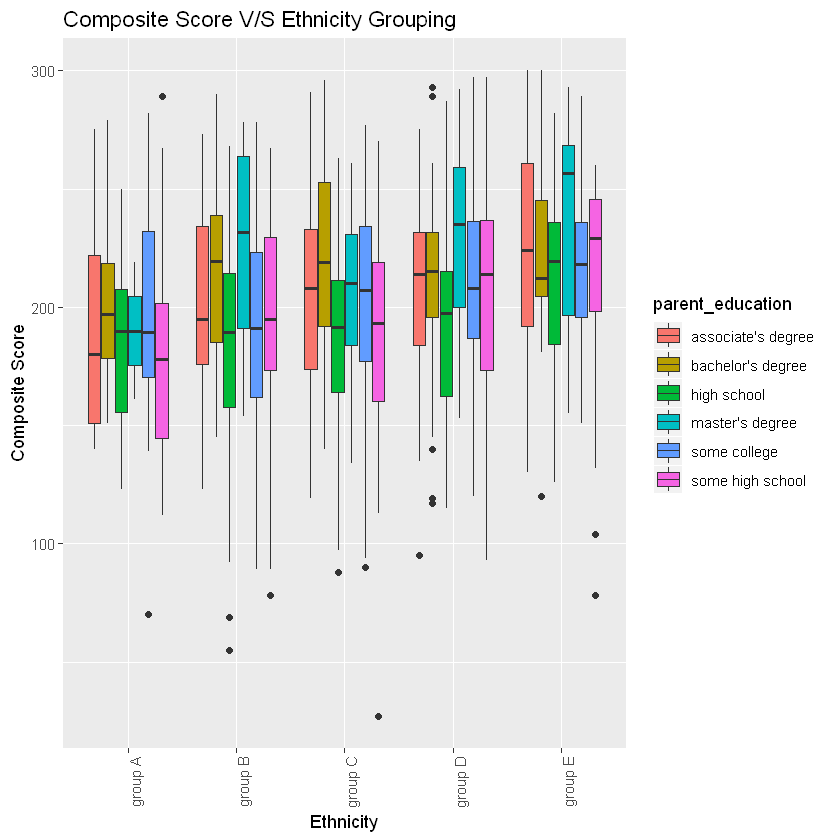

In [213]:
ggplot(data=students, aes(y=composite.score, x= ethnicity, fill= parent_education))+
    geom_boxplot()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    ggtitle("Composite Score V/S Ethnicity Grouping")+xlab("Ethnicity")+ylab("Composite Score")

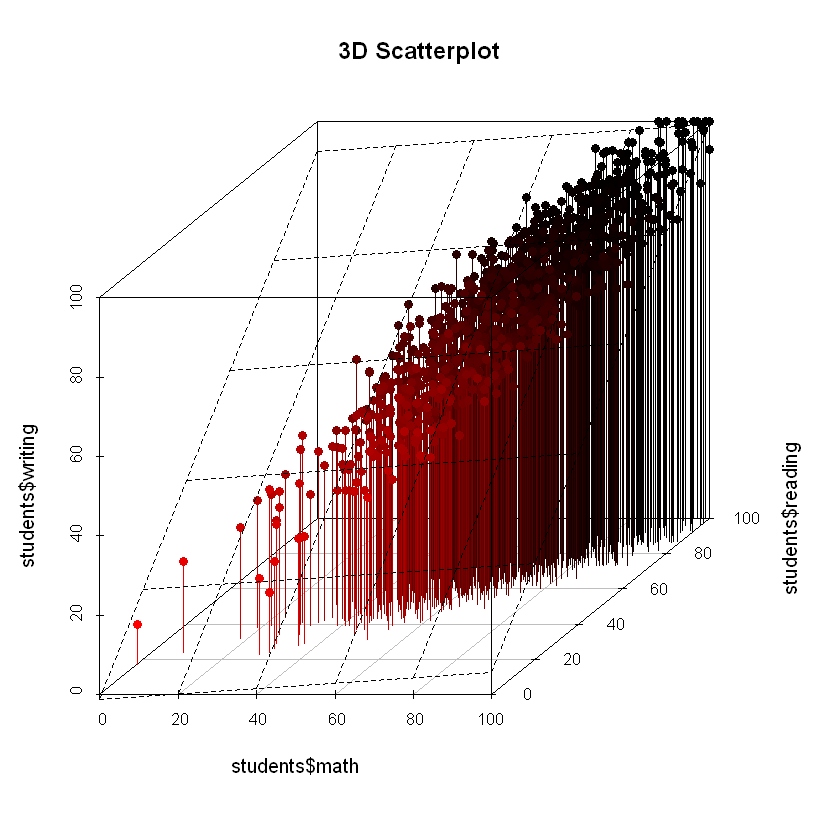

In [214]:
# 3D Scatterplot with Coloring and Vertical Lines
# and Regression Plane 
library(scatterplot3d) 

s3d <-scatterplot3d(students$math,students$reading,students$writing, pch=16, highlight.3d=TRUE,
  type="h", main="3D Scatterplot")
fit <- lm(students$writing ~ students$math+students$reading) 
s3d$plane3d(fit)

# Subject Score frequencies by cuts


In [215]:
math_scores = students$math
range(math_scores)
breaks = seq(0, 100, by=25)
math_scores.cut = cut(math_scores, breaks)
math_scores.freq = table(math_scores.cut)
cbind(math_scores.freq)
math_scores.freq

reading_scores = students$reading
range(reading_scores)
breaks = seq(0, 100, by=25)
reading_scores.cut = cut(reading_scores, breaks)
reading_scores.freq = table(reading_scores.cut)
cbind(reading_scores.freq)
reading_scores.freq

writing_scores = students$writing
range(writing_scores)
breaks = seq(0, 100, by=25)
writing_scores.cut = cut(writing_scores, breaks)
writing_scores.freq = table(writing_scores.cut)
cbind(writing_scores.freq)
writing_scores.freq

[1]   0 100

,math_scores.freq
"(0,25]",6
"(25,50]",143
"(50,75]",576
"(75,100]",274


math_scores.cut
  (0,25]  (25,50]  (50,75] (75,100] 
       6      143      576      274 

[1]  17 100

,reading_scores.freq
"(0,25]",4
"(25,50]",93
"(50,75]",559
"(75,100]",344


reading_scores.cut
  (0,25]  (25,50]  (50,75] (75,100] 
       4       93      559      344 

[1]  10 100

,writing_scores.freq
"(0,25]",5
"(25,50]",119
"(50,75]",548
"(75,100]",328


writing_scores.cut
  (0,25]  (25,50]  (50,75] (75,100] 
       5      119      548      328 

# Stem-And-Leaf Plots

    Stem and Leaf plots reflect the score occurrences.  A stem-and-leaf plot of a quantitative variable is a textual graph 
    that classifies data items according to their most significant numeric digits

    A stem-and-leaf plot of the score variable identifies scores with the same two most significant digits, and queue 
    them up in rows.

    Left value is the first digit of the score, which is the stem.  The right values are the 2nd digit of the score and 
    the range that leafs out.


In [216]:
# Math score STEM
stem(math_scores, scale=2)



  The decimal point is 1 digit(s) to the right of the |

   0 | 0
   0 | 8
   1 | 
   1 | 89
   2 | 234
   2 | 6778999
   3 | 00222344
   3 | 555556677778889999
   4 | 000000000011111122222233333444444444
   4 | 55555555566666666666777777777778888888888899999999999999999
   5 | 00000000000000011111111111222222222222222222333333333333333333333333+6
   5 | 55555555555555555566666666677777777777777777788888888888888888888888+22
   6 | 00000000000000001111111111111111111111111112222222222222222222222222+44
   6 | 55555555555555555555555555555555555566666666666666666666666677777777+64
   7 | 00000000000000000011111111111111111111111111222222222222222222333333+34
   7 | 55555555555555555555566666666666666666666677777777777777777777777788+22
   8 | 00000000000000000111111111111111111111122222222222222222233333333444
   8 | 55555555555555666666667777777777777777888888888888888999999
   9 | 0000000011111111122222233334444444
   9 | 55666777777888999
  10 | 0000000



In [217]:
stem(students$reading)


  The decimal point is 1 digit(s) to the right of the |

   1 | 7
   2 | 344
   2 | 6899
   3 | 1124444
   3 | 77788999999
   4 | 011111122222223333333334444
   4 | 5555555666666777788888888889999999999
   5 | 00000001111111111111111222222222222222233333333333334444444444444444
   5 | 55555555555555556666666666666666777777777777777778888888888888888888+14
   6 | 00000000000000000000011111111111111111111111122222222222222222222223+39
   6 | 55555555555555555556666666666666666666666666667777777777777777777777+34
   7 | 00000000000000000000000000111111111111111111112222222222222222222222+63
   7 | 55555555555555555555555555666666666666666666666666677777777777777777+41
   8 | 00000000000000111111111111111111111111122222222222222222222333333333+19
   8 | 55555555555555555566666666666666666667777777777777888888888999999999
   9 | 000000000000000001111112222222222333333444
   9 | 55555555666677777999
  10 | 00000000000000000



In [218]:
stem(students$writing)


  The decimal point is 1 digit(s) to the right of the |

   1 | 0
   1 | 59
   2 | 23
   2 | 7778
   3 | 02233444
   3 | 566667788888899
   4 | 00011111111222222233333333333344444444
   4 | 55555556666666666777777777788888888999999999
   5 | 00000000001111111111111111122222222222222222222333333333333333334444+9
   5 | 55555555555555666666666666667777777777777777777888888888888888888999
   6 | 00000000000000000000111111111111111111111222222222222222222222222222+25
   6 | 55555555555555555555556666666666666666666666667777777777777777777777+45
   7 | 00000000000000000000000000000000011111111111111111122222222222222222+59
   7 | 55555555555555555555556666666666666666666666666777777777777777777777+35
   8 | 00000000000000000000000000011111111111111111111222222222222222222222+20
   8 | 555555555555556666666666667777777777788888888888999999999
   9 | 00000000001111111111122222222233333333444444
   9 | 55555555666677889999
  10 | 00000000000000



# Linear Regression discussion - R Studio